In [47]:
import pandas as pd




In [48]:
df = pd.read_csv("C:\\Users\\Nainh\\Downloads\\Covid19Casos\\Covid19Casos.csv")
df["Aux"]=1
df["Month"]=pd.to_datetime(df["fecha_apertura"]).dt.month
df["Year"]=pd.to_datetime(df["fecha_apertura"]).dt.year
df_covid=pd.DataFrame(pd.pivot_table(df,index=['carga_provincia_id',"Year","Month"],values=["Aux"],aggfunc="sum").to_records())
df_covid.columns=["cod_prov","FNYear","Month","Covid_Cases"]

In [3]:
pd.to_datetime(df["fecha_apertura"]).max()

Timestamp('2022-06-04 00:00:00')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extracting years from column names
years = [int(column.split('_')[-1][-2:]) for column in df2_ob_m.columns if 'AdjOb_Masc' in column]

# Create a new DataFrame with years as columns
new_years = [f'200{i}' for i in range(5, 19)]
new_df = pd.DataFrame(columns=['cod_prov', 'pcia'] + new_years)

# Iterate over the original DataFrame to populate the new DataFrame
for index, row in df2_ob_m.iterrows():
    cod_prov = row['cod_prov']
    pcia = row['pcia']
    values = [row[column] for column in df2_ob_m.columns if 'AdjOb_Masc' in column]
    
    # Check if there are available values for interpolation
    if all(np.isnan(values)):
        # If all values are NaN, skip interpolation
        interpolated_values = [np.nan] * len(new_years)
    else:
        # Interpolate values between 2005 and 2009
        interpolated_values = np.interp(np.arange(5, 19), years, values)
    
    new_df.loc[index] = [cod_prov, pcia] + list(interpolated_values)

# Set the new DataFrame as df2_ob_m
df2_ob_m = new_df

# Dividing regions into groups of 5
groups_of_5 = [df2_ob_m['pcia'].iloc[i:i+5] for i in range(0, len(df2_ob_m['pcia']), 5)]
groups_of_5_data = [{key: df2_ob_m[key].iloc[i:i+5] for key in df2_ob_m} for i in range(0, len(df2_ob_m['pcia']), 5)]

# Plotting each group
for group_data in groups_of_5_data:
    plt.figure(figsize=(10, 6))
    for i, region in enumerate(group_data['pcia']):
        plt.plot(new_years, [group_data[column].iloc[i] for column in group_data if column != 'pcia' and column != 'cod_prov'], label=region)
    plt.xlabel('Years')
    plt.ylabel('Values')
    plt.title('AdjOb_Masc by Year and Region')
    plt.legend()
    plt.grid(True)
    plt.show()


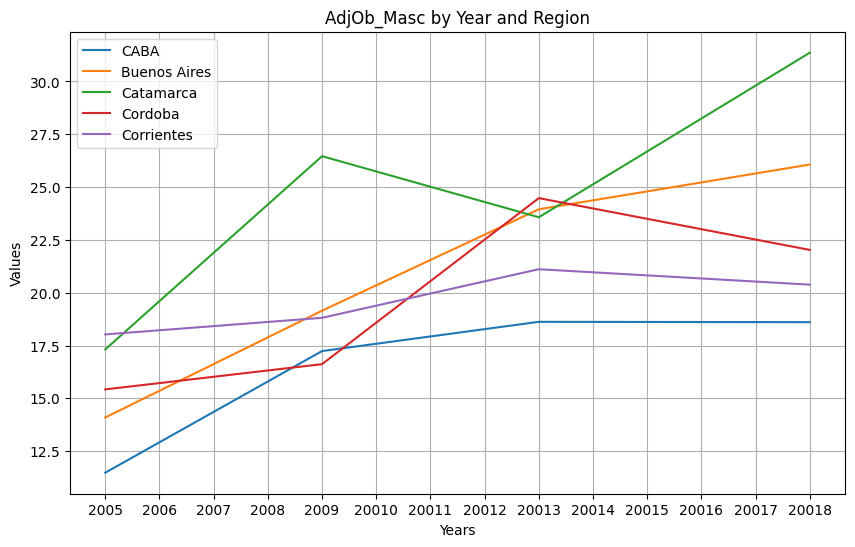

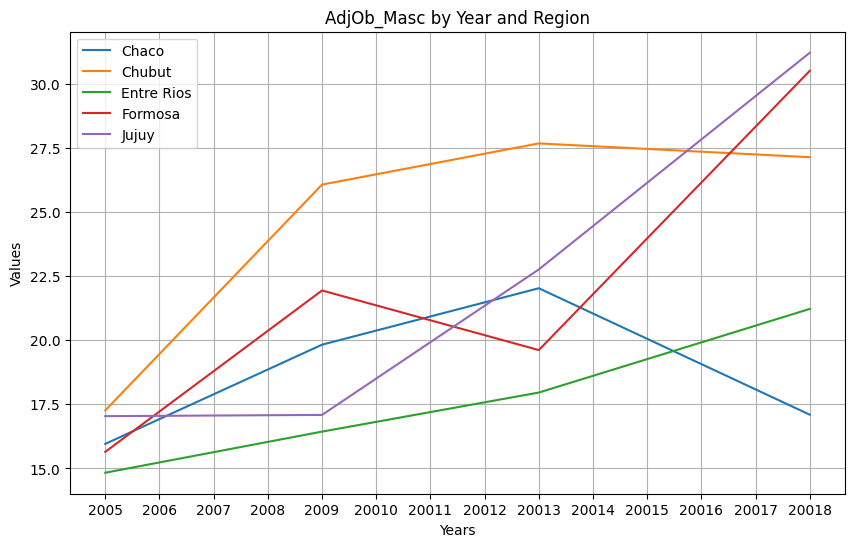

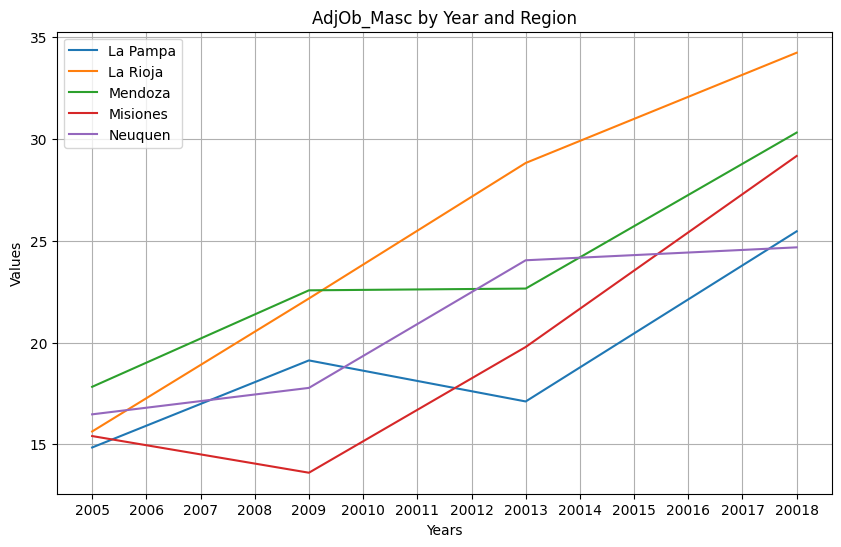

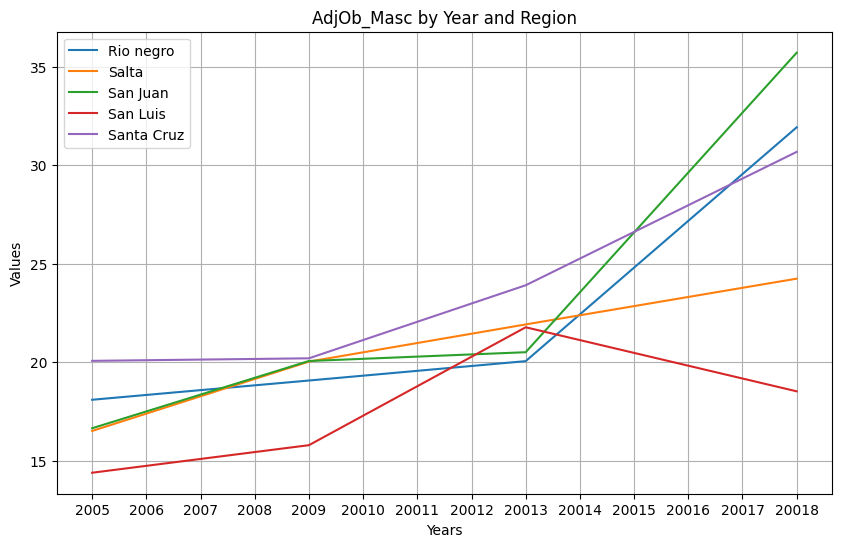

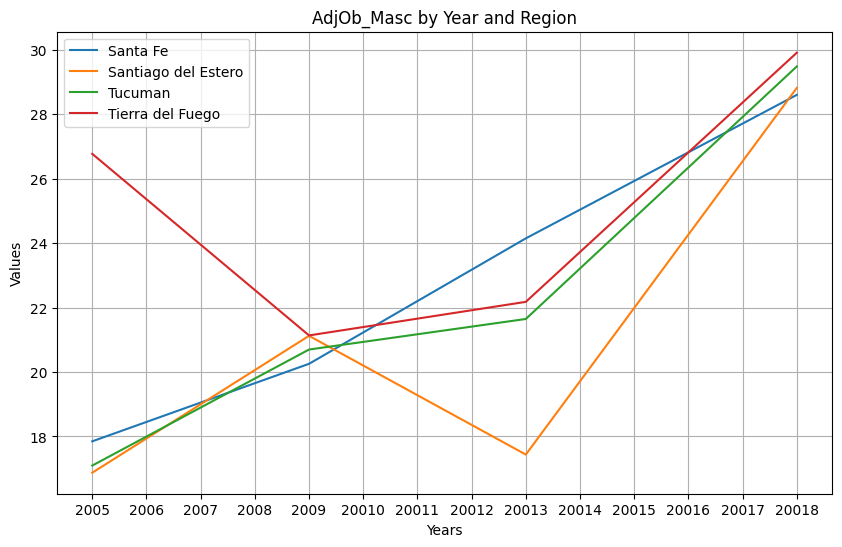

In [31]:
import matplotlib.pyplot as plt

# Dividing regions into groups of 5
groups_of_5 = [df2_ob_m['pcia'].iloc[i:i+5] for i in range(0, len(df2_ob_m['pcia']), 5)]
groups_of_5_data = [{key: df2_ob_m[key].iloc[i:i+5] for key in df2_ob_m} for i in range(0, len(df2_ob_m['pcia']), 5)]

# Plotting each group
for group_data in groups_of_5_data:
    plt.figure(figsize=(10, 6))
    for i, region in enumerate(group_data['pcia']):
        plt.plot(new_years, [group_data[column].iloc[i] for column in group_data if column != 'pcia' and column != 'cod_prov'], label=region)
    plt.xlabel('Years')
    plt.ylabel('Values')
    plt.title('AdjOb_Masc by Year and Region')
    plt.legend()
    plt.grid(True)
    plt.show()